In [20]:
import os
import openai
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
openai.api_key = os.getenv("OPENAI_API_KEY")

In [22]:
ticket_df = pd.read_csv("ITTickets.csv")

In [23]:
sampled_ticket_df = ticket_df.loc[:49]

In [24]:
sampled_ticket_df['ticket_description'] = ''
sampled_ticket_df.ticket_description = ["".join(description.split("\n")) for description in sampled_ticket_df['Ticket Description']]
sampled_ticket_df.ticket_description = [ desc.replace("I'm having an issue with the {product_purchased}. Please assist.","") for desc in sampled_ticket_df.ticket_description]

C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\2494447087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df['ticket_description'] = ''
C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\2494447087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df.ticket_description = ["".join(description.split("\n")) for description in sampled_ticket_df['Ticket Description']]
C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\2494447087.py:3: SettingWithCopyWarning: 
A value

In [25]:
counter = 1
for desc in sampled_ticket_df.ticket_description:
    print(str(counter)+". "+desc)
    counter += 1

1. Your billing zip code is: 71701.We appreciate that you have requested a website address.Please double check your email address. I've tried troubleshooting steps mentioned in the user manual, but the issue persists.
2. If you need to change an existing product.If The issue I'm facing is intermittent. Sometimes it works fine, but other times it acts up unexpectedly.
3. I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't respond.1.8.3 I really I'm using the original charger that came with my {product_purchased}, but it's not charging properly.
4. If you have a problem you're interested in and I'd love to see this happen, please check out the Feedback. I've already contacted customer support multiple times, but the issue remains unresolved.
5. Note: The seller is not responsible for any damages arising out of the delivery of the battleground game. Please have the game in good condition and s

In [26]:
def classify_using_gpt(message):
    response = openai.Completion.create(
        model="text-davinci-003",
        prompt=message,
        temperature=0,
        max_tokens=15,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0)
        
    sentiment = response["choices"][0]["text"].replace("\n\n","")
    return sentiment

In [27]:
sampled_ticket_df['gpt_classification']=''
sampled_ticket_df.gpt_classification = [classify_using_gpt("classify the sentiment in \"{0}\" as normal or moderate or high".format(desc)) for desc in sampled_ticket_df.ticket_description]

C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\1209149750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df['gpt_classification']=''
C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\1209149750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df.gpt_classification = [classify_using_gpt("classify the sentiment in \"{0}\" as normal or moderate or high".format(desc)) for desc in sampled_ticket_df.ticket_description]


In [28]:
sampled_ticket_df.gpt_classification = [senti.replace(".","") for senti in sampled_ticket_df.gpt_classification]
sampled_ticket_df.gpt_classification = [senti.replace("The sentiment in this statement is ","")  for senti in sampled_ticket_df.gpt_classification]
sampled_ticket_df.gpt_classification = [senti.lower() for senti in sampled_ticket_df.gpt_classification]

C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\3051811038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df.gpt_classification = [senti.replace(".","") for senti in sampled_ticket_df.gpt_classification]
C:\Users\ic016726\AppData\Local\Temp\ipykernel_21596\3051811038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_ticket_df.gpt_classification = [senti.replace("The sentiment in this statement is ","")  for senti in sampled_ticket_df.gpt_classification]
C:\Users\ic016726\A

In [29]:
sampled_ticket_df[['ticket_description','gpt_classification']]

,ticket_description,gpt_classification
0,Your billing zip code is: 71701.We appreciate ...,normal
1,If you need to change an existing product.If T...,moderate
2,I'm facing a problem with my {product_purchase...,moderate
3,If you have a problem you're interested in and...,moderate
4,Note: The seller is not responsible for any da...,moderate
5,I'm facing a problem with my {product_purchase...,moderate
6,I'm unable to access my {product_purchased} ac...,normal
7,(Thanks) I will contact all my suppliers and ...,normal
8,Thank you.{product_purchased} is not the exac...,normal
9,My {product_purchased} is making strange noise...,moderate


<Axes: >

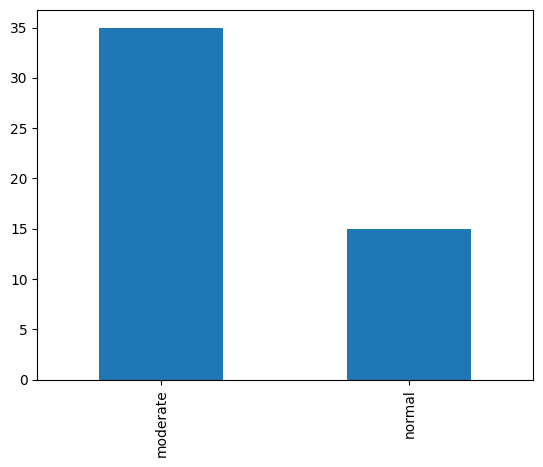

In [30]:
sampled_ticket_df['gpt_classification'].value_counts().plot(kind='bar')

In [32]:
for desc,senti in zip(sampled_ticket_df.ticket_description,sampled_ticket_df.gpt_classification):
    print(desc,"-",senti)

Your billing zip code is: 71701.We appreciate that you have requested a website address.Please double check your email address. I've tried troubleshooting steps mentioned in the user manual, but the issue persists. - normal
If you need to change an existing product.If The issue I'm facing is intermittent. Sometimes it works fine, but other times it acts up unexpectedly. - moderate
I'm facing a problem with my {product_purchased}. The {product_purchased} is not turning on. It was working fine until yesterday, but now it doesn't respond.1.8.3 I really I'm using the original charger that came with my {product_purchased}, but it's not charging properly. - moderate
If you have a problem you're interested in and I'd love to see this happen, please check out the Feedback. I've already contacted customer support multiple times, but the issue remains unresolved. - moderate
Note: The seller is not responsible for any damages arising out of the delivery of the battleground game. Please have the g